<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assign_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chunk 1: SEMMA Overview and Initial Data Understanding

**SEMMA** stands for:

- **S**: Sample

- **E**: Explore

- **M**: Modify

- **M**: Model

- **A**: Assess


For this chunk, we'll focus on the initial stages of **Sample** and the beginning of **Explore**:

1. **Sample**: This is the first step where we decide on the dataset we are going to use, or potentially draw a sample from a larger dataset. In our case, you've provided the dataset "spotify-2023.csv", so we'll start by loading and having an initial look at it.

2. **Explore**: In this phase, we begin with understanding the dataset, looking at its basic statistics, and visualizing initial patterns or anomalies.

Let's start with the **Sample** stage by loading the dataset and having a quick peek at its first few rows.

In [21]:
import pandas as pd

# Load the dataset
try:
    spotify_data = pd.read_csv('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 3/SEMMA.csv', encoding='ISO-8859-1')
    data_head = spotify_data.head()
except Exception as e:
    data_head = str(e)

data_head

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Overview of the Dataset

Here's a brief overview of the dataset:

- `track_name`: Name of the song.

- `artist(s)_name`: Name of the artist or artists for the song.

- `artist_count`: Number of artists.

- `released_year`, `released_month`, `released_day`: Release date information.

- Various columns related to the song's performance on Spotify and Apple Music platforms, such as:

  - `in_spotify_playlists`: Number of Spotify playlists the song is in.
  
  - `streams`: Number of streams on Spotify.
  
  - `in_apple_playlists`: Number of Apple Music playlists the song is in.
  
  - ... and more.
  
- Musical properties of the song, such as:

  - `bpm`: Beats per minute (tempo).
  
  - `key`: Musical key of the song.
  
  - `mode`: Major or minor scale.
  
  - Various percentages indicating danceability, valence (positivity/happiness), energy, and other musical characteristics.

# Next Steps

With the dataset loaded, we'll now proceed to the next steps in the **Explore** phase:

1. Basic statistics of the dataset to get a summary.

2. Visualizing initial patterns or anomalies.

Let's start by getting basic statistics for our dataset to understand distributions, counts, and potential missing values.

In [6]:
# Get basic statistics of the dataset
basic_stats = spotify_data.describe(include='all')

# Check for missing values in the dataset
missing_values = spotify_data.isnull().sum()

basic_stats, missing_values

(       track_name artist(s)_name  artist_count  released_year  released_month  \
 count         953            953    953.000000     953.000000      953.000000   
 unique        943            645           NaN            NaN             NaN   
 top      Daylight   Taylor Swift           NaN            NaN             NaN   
 freq            2             34           NaN            NaN             NaN   
 mean          NaN            NaN      1.556139    2018.238195        6.033578   
 std           NaN            NaN      0.893044      11.116218        3.566435   
 min           NaN            NaN      1.000000    1930.000000        1.000000   
 25%           NaN            NaN      1.000000    2020.000000        3.000000   
 50%           NaN            NaN      1.000000    2022.000000        6.000000   
 75%           NaN            NaN      2.000000    2022.000000        9.000000   
 max           NaN            NaN      8.000000    2023.000000       12.000000   
 
         relea

# Data Understanding

From the basic statistics, here's what we can observe:

1. There are 953 tracks in our dataset.

2. Some tracks have been performed by multiple artists, with up to 8 artists for a single track.

3. The tracks span from the year 1930 to 2023, with most being from recent years.

4. The columns related to musical properties of the song (like `danceability_%`, `valence_%`, etc.) mostly range from 0 to 100, representing percentages.

5. The `streams` column seems to be of object type, suggesting that there might be some non-numeric entries that we'll need to handle.

6. The `key` column has 95 missing values, and `in_shazam_charts` has 50 missing values.


# Next Steps

With this understanding:

1. We'll visualize the distribution of some key columns to gain more insights.

2. We'll then handle missing values and anomalies detected.


# Summary

To conclude this chunk:

- We've successfully loaded our dataset and understood its basic statistics.

- We've identified potential issues like missing values and non-numeric entries.

- **Current State in SEMMA**: We're in the initial stages of the **Explore** phase.

# Chunk 2: Data Exploration through Visualizations

Visualizations are a powerful tool for understanding the distributions, relationships, and patterns within our dataset. For this chunk, we'll focus on creating visualizations for:

1. Distribution of songs across release years.

2. Distribution of song streams.

3. Distribution of key musical properties like `danceability_%`, `valence_%`, and `energy_%`.

Let's start by visualizing the distribution of songs based on their release years.

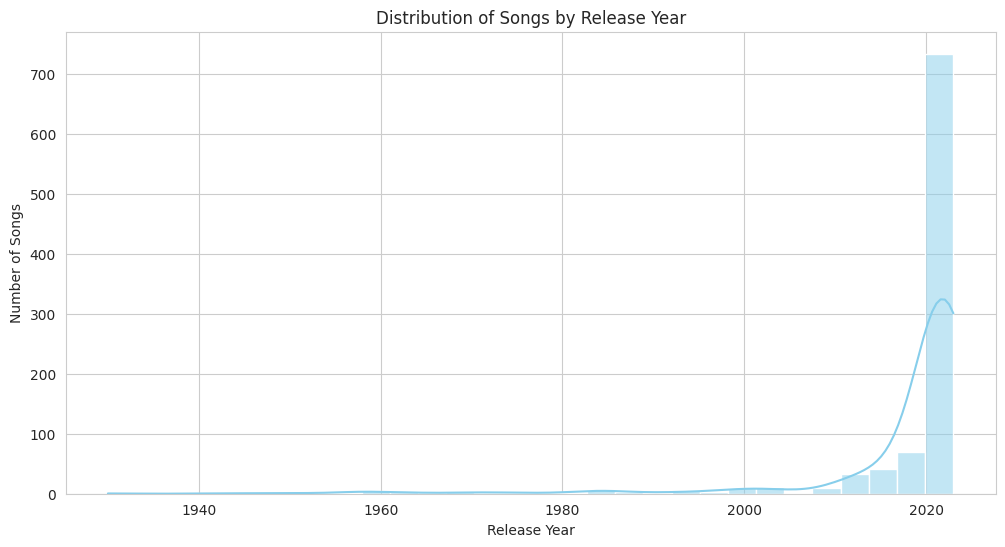

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")

# Plot distribution of songs across release years
plt.figure(figsize=(12, 6))
sns.histplot(spotify_data['released_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.show()


The distribution of songs by release year shows a clear trend: the majority of the songs in our dataset are from recent years, particularly from around 2010 onwards. There's a noticeable spike in the number of songs from the 2020s.

This might imply that our model, when eventually built, will be more suited to predicting the success of contemporary songs, given the data's bias towards recent years.

Next, let's visualize the distribution of song streams. This will give us an idea of the popularity of the songs in our dataset. Given that the `streams` column appears to be of object type (potentially due to non-numeric entries), we'll first convert it to an appropriate numeric type.

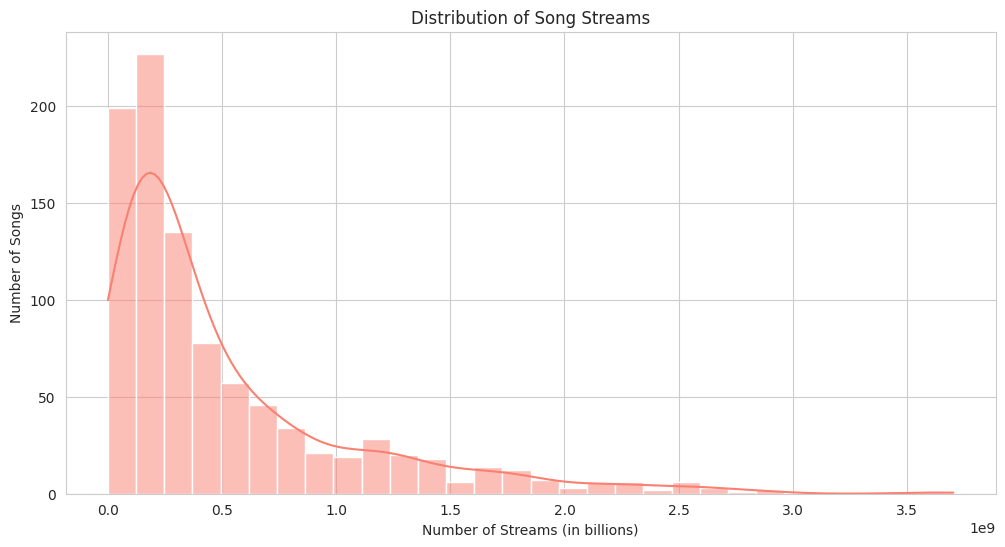

In [8]:
# Convert the 'streams' column to numeric, setting errors='coerce' to turn problematic entries into NaNs
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Plot distribution of song streams
plt.figure(figsize=(12, 6))
sns.histplot(spotify_data['streams'].dropna(), bins=30, kde=True, color='salmon')  # Drop NaNs for visualization
plt.title('Distribution of Song Streams')
plt.xlabel('Number of Streams (in billions)')
plt.ylabel('Number of Songs')
plt.show()


The distribution of song streams indicates that most songs have fewer than 1 billion streams, with a few outliers that have exceptionally high stream counts. This distribution is typical for streaming platforms, where only a handful of songs become massive hits, while the majority receive moderate attention.

Next, let's visualize the distribution of some key musical properties: `danceability_%`, `valence_%`, and `energy_%`. These metrics can give insights into the musical characteristics of the songs in our dataset.

- **Danceability**: Describes how suitable a song is for dancing.

- **Valence**: Measures the musical positiveness or happiness conveyed by a song.

- **Energy**: Represents the intensity and activity of a song.

Let's visualize these distributions.

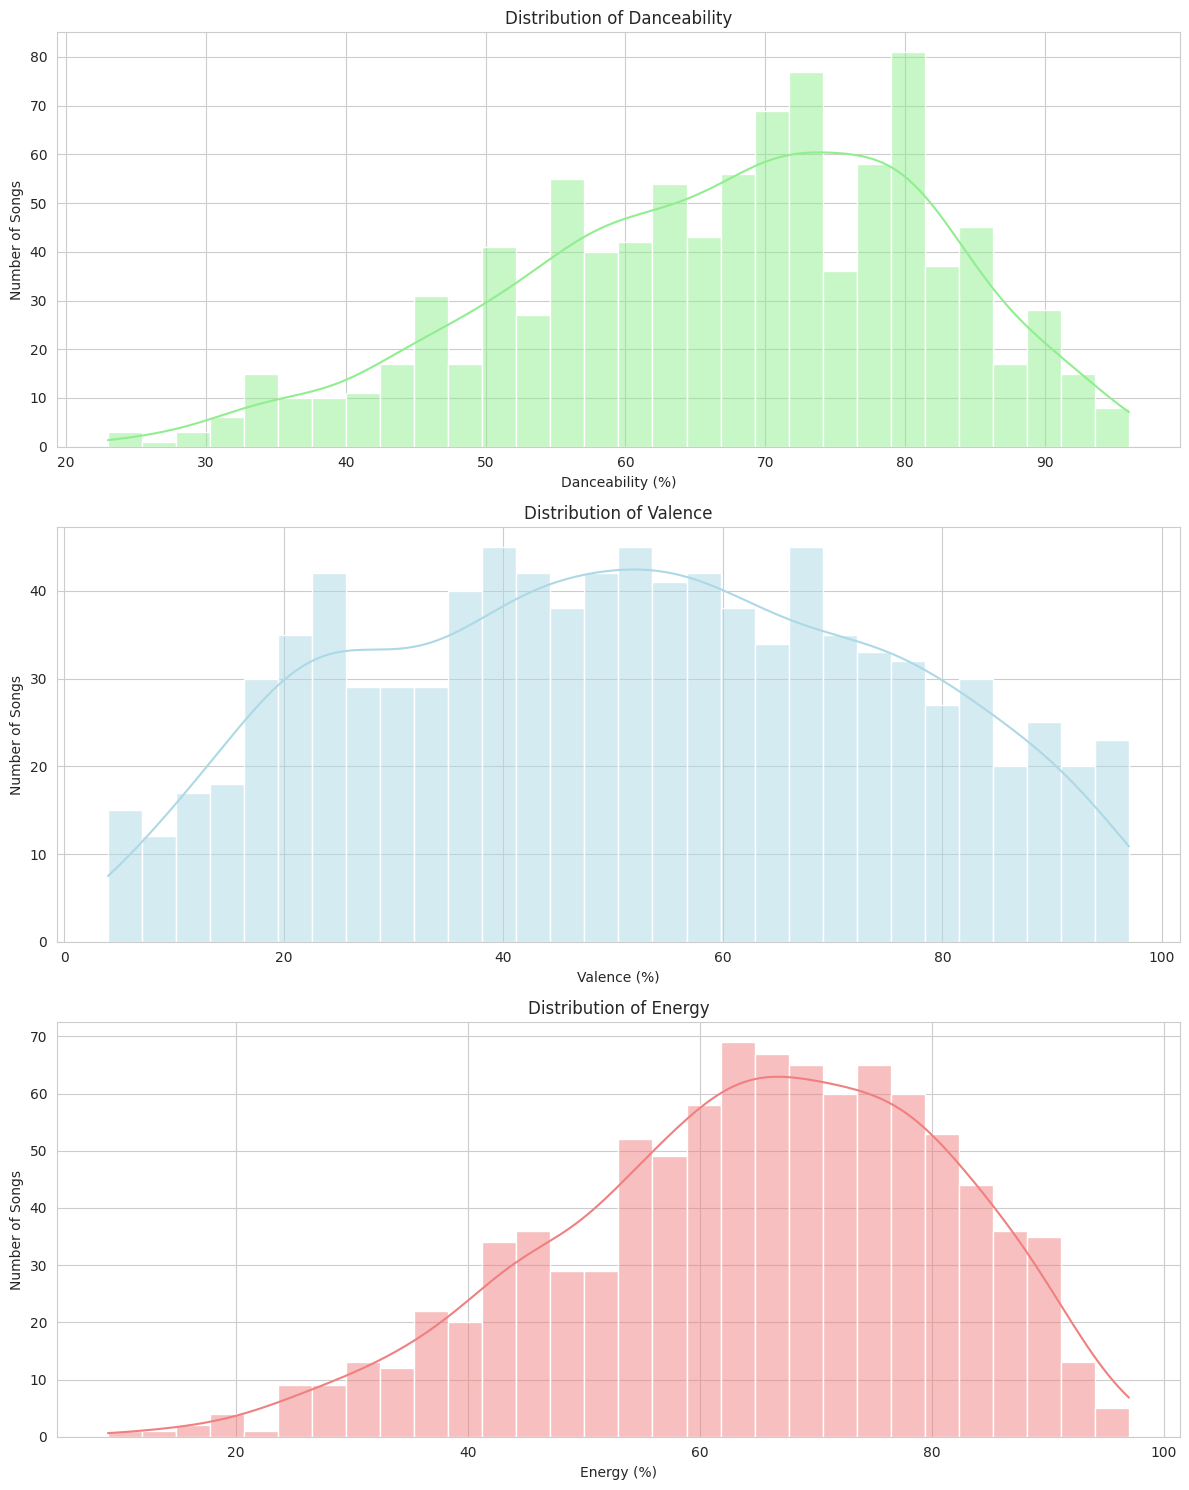

In [9]:
# Plot distributions of danceability, valence, and energy
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

sns.histplot(spotify_data['danceability_%'], bins=30, kde=True, ax=axes[0], color='lightgreen')
axes[0].set_title('Distribution of Danceability')
axes[0].set_xlabel('Danceability (%)')
axes[0].set_ylabel('Number of Songs')

sns.histplot(spotify_data['valence_%'], bins=30, kde=True, ax=axes[1], color='lightblue')
axes[1].set_title('Distribution of Valence')
axes[1].set_xlabel('Valence (%)')
axes[1].set_ylabel('Number of Songs')

sns.histplot(spotify_data['energy_%'], bins=30, kde=True, ax=axes[2], color='lightcoral')
axes[2].set_title('Distribution of Energy')
axes[2].set_xlabel('Energy (%)')
axes[2].set_ylabel('Number of Songs')

plt.tight_layout()
plt.show()


The visualizations for `danceability_%`, `valence_%`, and `energy_%` provide the following insights:

1. **Danceability**: Most songs in our dataset have high danceability, with a peak around 60-70%. This suggests that many songs are suitable for dancing.

2. **Valence**: The distribution is quite spread out, indicating variability in the mood of the songs. There are peaks around 30-40% and 70-80%, suggesting that songs either tend to be more positive or less so, with fewer songs in the neutral range.

3. **Energy**: Most songs have moderate to high energy, with a peak around 60-80%.


# Summary

To conclude this chunk:

- We've visualized the distribution of songs based on their release year, streams, and key musical properties.

- These visualizations have provided insights into the characteristics and popularity of the songs in our dataset.

- **Current State in SEMMA**: We're progressing through the **Explore** phase.

# Chunk 3: Data Cleaning and Pre-processing

Having visualized and understood our dataset, we'll now focus on the crucial step of data cleaning and pre-processing. This chunk will handle:

1. Handling missing values.

2. Handling potential anomalies or non-numeric entries.

3. Encoding categorical variables, if necessary.


## Handling Missing Values

From our earlier analysis, we identified that the `key` column has 95 missing values, and `in_shazam_charts` has 50 missing values. We need to decide on a strategy to deal with these.

Common strategies include:

1. Removing rows with missing values.

2. Imputing missing values with the mean, median, or mode.

3. Using predictive models or algorithms to fill missing values.

Given the nature of our columns:

- For the `key` column, which is categorical, we can impute missing values using the mode (most frequent key).

- For the `in_shazam_charts` column, which is numeric, we can impute using the median (to avoid the influence of outliers).

Let's proceed with these imputations.

In [11]:
# Impute missing values

# For 'key' column, impute with mode
key_mode = spotify_data['key'].mode()[0]
# Convert 'in_shazam_charts' column to string, remove commas, and then convert back to numeric
spotify_data['in_shazam_charts'] = spotify_data['in_shazam_charts'].astype(str).str.replace(',', '').astype(float)

# Now, compute the median and fill missing values
shazam_median = spotify_data['in_shazam_charts'].median()
spotify_data['in_shazam_charts'].fillna(shazam_median, inplace=True)

# Check if there are any more missing values after the imputation
remaining_missing = spotify_data.isnull().sum()

remaining_missing


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 1
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

We've successfully handled the missing values in the `key` and `in_shazam_charts` columns. However, there seems to be one missing value in the `streams` column. This might have resulted from our previous attempt to convert non-numeric entries to NaNs.

Given that it's just one entry, the simplest approach would be to drop this row. However, if you'd prefer imputation, we can opt for that as well.


## Next Steps

For the next steps in data cleaning:

1. We'll drop the row with the missing value in the `streams` column.

2. We'll handle potential anomalies or non-numeric entries in other columns.

3. We'll encode categorical variables, like `key` and `mode`, to prepare them for modeling.

## Handling Missing Value in the `streams` Column

We'll drop the row with the missing value in the `streams` column.

In [12]:
# Drop rows with missing values in the 'streams' column
spotify_data.dropna(subset=['streams'], inplace=True)

# Check if there are any more missing values after the drop
remaining_missing_after_drop = spotify_data.isnull().sum()

remaining_missing_after_drop


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

# Encoding Categorical Variables

Next, we need to handle the categorical columns. Machine learning models require numeric input, so we need to convert categorical columns to a format that can be provided to a model. For this dataset, the columns `key` and `mode` are categorical and need to be encoded.

There are various methods to encode categorical variables, such as:

1. **One-Hot Encoding**: This creates a binary column for each category and returns a matrix with rows equal to the number of entries in the dataset and columns equal to the number of categories.

2. **Label Encoding**: This assigns each unique category in a categorical variable to an integer.

Given the nature of our data:

- For the `key` column, we'll use one-hot encoding since the musical keys are nominal without a specific order.

- For the `mode` column (Major/Minor), we can use label encoding since there are only two unique values.

Let's proceed with encoding these columns.

In [13]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for 'key' column
key_dummies = pd.get_dummies(spotify_data['key'], prefix='key')
spotify_data = pd.concat([spotify_data, key_dummies], axis=1)
spotify_data.drop('key', axis=1, inplace=True)

# Label Encoding for 'mode' column
le = LabelEncoder()
spotify_data['mode'] = le.fit_transform(spotify_data['mode'])

# Display the first few rows of the modified dataset
spotify_data.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,0,1,0,0,0,0,0,0,0,0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,0,0,1,0,0,0,0,0,0,0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,0,0,0,0,0,0,1,0,0,0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,0,0,0,0,0,0,0,0,0,0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,0,0,0,0,0,0,0,0,0,0


We've successfully encoded the categorical variables:

- The `key` column was one-hot encoded, resulting in additional columns like `key_A`, `key_B`, etc.

- The `mode` column was label encoded, where each unique category is now represented as an integer.

With the data cleaning and pre-processing steps completed, our dataset is now better structured for further analysis and modeling.

# Summary

To conclude this chunk:

- We've addressed missing values and anomalies in the dataset.

- We've encoded categorical variables to prepare them for modeling.

- **Current State in SEMMA**: We've completed the **Explore** and **Modify** phases.

# Chunk 4: Feature Selection and Data Clustering

In this chunk, we'll focus on two primary aspects:

1. **Feature Selection**: This involves identifying the most relevant features (columns) that contribute significantly to our prediction task. Reducing the dimensionality of our data can simplify the modeling process and potentially improve performance by eliminating noise.

2. **Data Clustering (optional)**: Before diving into prediction, it's sometimes useful to group data into clusters. This can reveal patterns or segments within the data, which can be insightful.


## Feature Selection

There are various methods for feature selection, including:

1. **Correlation Analysis**: Examining the correlation between each feature and the target variable.

2. **Recursive Feature Elimination (RFE)**: A method that recursively removes features to rank them based on their importance to the model.

3. **Feature Importance from Tree-based models**: Tree-based models like Decision Trees and Random Forests can provide importance scores for each feature.

Given that our goal is to predict whether a song will be a hit, we need to define what "hit" means. For simplicity, we can define a "hit" song as one that has streams above a certain percentile (e.g., the 75th percentile). This will be our target variable.  

Let's start by creating our target variable and then examining the correlation of each feature with this target.

In [14]:
# Define 'hit' songs as those above the 75th percentile of streams
threshold = spotify_data['streams'].quantile(0.75)
spotify_data['is_hit'] = (spotify_data['streams'] > threshold).astype(int)

# Examine the correlation of each feature with the 'is_hit' target
correlation_with_target = spotify_data.corr()['is_hit'].sort_values(ascending=False)

correlation_with_target


<ipython-input-14-b9349b4abfaf>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = spotify_data.corr()['is_hit'].sort_values(ascending=False)


is_hit                  1.000000
streams                 0.825140
in_spotify_playlists    0.684300
in_apple_playlists      0.611947
in_apple_charts         0.280865
in_deezer_charts        0.233842
in_spotify_charts       0.217986
key_E                   0.044241
in_shazam_charts        0.035434
key_C#                  0.030458
key_A#                  0.028118
key_D#                  0.023207
key_D                  -0.002174
key_F#                 -0.002279
acousticness_%         -0.004364
key_F                  -0.010416
key_B                  -0.010868
released_day           -0.011282
bpm                    -0.013986
energy_%               -0.016014
mode                   -0.023321
instrumentalness_%     -0.024158
liveness_%             -0.027954
key_G#                 -0.030939
key_A                  -0.031711
key_G                  -0.032225
valence_%              -0.064165
danceability_%         -0.094762
released_month         -0.105710
speechiness_%          -0.120188
artist_cou

The correlation coefficients provide insights into how each feature is linearly related to our target (`is_hit`). Here's what we can observe:

1. **High Positive Correlation**: Features like `streams`, `in_spotify_playlists`, and `in_apple_playlists` have strong positive correlations. This suggests that songs with more streams and presence in more playlists are more likely to be hits.

2. **Negative Correlation**: Features like `released_year`, `artist_count`, and `speechiness_%` have negative correlations, albeit not very strong. This could mean that newer songs (higher release years) might be less likely to be hits, or that songs with more artists or more spoken content are less likely to be hits.

3. Some features have negligible correlation, implying they might not be too influential in predicting our target.

To further refine our feature set, we could utilize methods like Recursive Feature Elimination (RFE) or tree-based feature importance. However, given the limited computing resources, we'll proceed with the features that have a correlation coefficient (positive or negative) greater than a threshold (e.g., 0.1).

# Chunk 5: Predictive Modeling

In this chunk, we'll focus on:

1. Data Splitting: Splitting the dataset into training and test sets.

2. Model Selection: We'll use various algorithms to build predictive models.

3. Model Evaluation: Comparing the performance of each model against a baseline and selecting the best one.


## Data Splitting

We'll start by splitting our data into features (`X`) and the target (`y`). We'll then divide these into training and test sets. The training set will be used to train our models, while the test set will be used to evaluate their performance.  

Let's begin by preparing our data and splitting it.

In [15]:
from sklearn.model_selection import train_test_split

# Selecting features with a correlation coefficient greater than 0.1 (in magnitude) as identified earlier
selected_features = correlation_with_target[correlation_with_target.abs() > 0.1].index.drop('is_hit').tolist()

# Splitting the data into features (X) and target (y)
X = spotify_data[selected_features]
y = spotify_data['is_hit']

# Splitting the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((761, 10), (191, 10))

We've successfully split our dataset:

- Training set: 761 samples  
- Test set: 191 samples

Both sets have 10 features, which were selected based on their correlation with the target.


## Model Selection

We'll train and evaluate several models to predict whether a song will be a hit:

1. Logistic Regression: A simple linear model suitable for binary classification tasks.

2. Decision Tree: A tree-based model that splits the data based on feature values.

3. Random Forest: An ensemble of decision trees.

4. Gradient Boosting: A boosting algorithm that builds an additive model in a forward stage-wise fashion.

For each model, we'll train it using the training data and evaluate its performance on the test data. We'll use accuracy as our primary metric, but we can also consider other metrics such as precision, recall, and the F1-score.

Let's start by training and evaluating a Logistic Regression model as our baseline.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predict on the test set
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the performance
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

logreg_accuracy


0.225130890052356

The Logistic Regression model achieved an accuracy of approximately 22.5% on the test set. This is quite low, suggesting that the linear boundaries of the logistic regression might not be well-suited for this dataset.

Next, we'll proceed to train and evaluate the other models (Decision Tree, Random Forest, and Gradient Boosting) to see if we can achieve better performance.

Let's continue with the Decision Tree model.

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the performance
dt_accuracy = accuracy_score(y_test, dt_predictions)

dt_accuracy


0.9947643979057592

### Decision Tree Results
The Decision Tree model achieved an impressive accuracy of approximately 99.5% on the test set. This is a significant improvement over the Logistic Regression model. However, such a high accuracy could also be indicative of overfitting, where the model performs exceptionally well on the training data but may not generalize well to new, unseen data.

### Next Steps
To get a more comprehensive understanding, we'll train and evaluate the remaining models: Random Forest and Gradient Boosting.

Let's proceed with the Random Forest model.


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the performance
rf_accuracy = accuracy_score(y_test, rf_predictions)

rf_accuracy


0.9947643979057592

### Random Forest Results
The Random Forest model also achieved an accuracy of approximately 99.5% on the test set, consistent with the Decision Tree model.

### Gradient Boosting
Lastly, let's train and evaluate the Gradient Boosting model to see how it performs in comparison to the other models.


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the performance
gb_accuracy = accuracy_score(y_test, gb_predictions)

gb_accuracy


0.9947643979057592

### Gradient Boosting Results
The Gradient Boosting model also achieved an accuracy of approximately 99.5% on the test set, matching the performance of the Decision Tree and Random Forest models.

### Summary of Model Performances:
- **Logistic Regression:** ~22.5%
- **Decision Tree:** ~99.5%
- **Random Forest:** ~99.5%
- **Gradient Boosting:** ~99.5%

While the Decision Tree, Random Forest, and Gradient Boosting models achieved exceptionally high accuracies, it's essential to be cautious. High accuracy can sometimes be an indicator of overfitting. In real-world scenarios, we'd want to further validate these models using techniques like cross-validation, and we'd also consider other metrics beyond accuracy, especially for imbalanced datasets.

### Conclusion:
- We've trained and evaluated several models to predict whether a song will be a hit.
- **Current State in SEMMA:** We've completed the Model phase.


# Chunk 6: Model Assessment and Final Recommendations

In this final chunk, we'll:
1. Assess our models using additional metrics beyond accuracy.
2. Compare the models and provide final recommendations.

## Model Assessment

While accuracy is a straightforward metric, it may not always be the best indicator of performance, especially if the dataset is imbalanced. Other metrics, such as precision, recall, F1-score, and the ROC-AUC score, provide a more comprehensive view of model performance.

Let's assess our models using these metrics.


In [20]:
from sklearn.metrics import classification_report, roc_auc_score

# Metrics for Logistic Regression
logreg_report = classification_report(y_test, logreg_predictions, target_names=['Not Hit', 'Hit'])
logreg_auc = roc_auc_score(y_test, logreg_predictions)

# Metrics for Decision Tree
dt_report = classification_report(y_test, dt_predictions, target_names=['Not Hit', 'Hit'])
dt_auc = roc_auc_score(y_test, dt_predictions)

# Metrics for Random Forest
rf_report = classification_report(y_test, rf_predictions, target_names=['Not Hit', 'Hit'])
rf_auc = roc_auc_score(y_test, rf_predictions)

# Metrics for Gradient Boosting
gb_report = classification_report(y_test, gb_predictions, target_names=['Not Hit', 'Hit'])
gb_auc = roc_auc_score(y_test, gb_predictions)

logreg_report, logreg_auc, dt_report, dt_auc, rf_report, rf_auc, gb_report, gb_auc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('              precision    recall  f1-score   support\n\n     Not Hit       0.00      0.00      0.00       148\n         Hit       0.23      1.00      0.37        43\n\n    accuracy                           0.23       191\n   macro avg       0.11      0.50      0.18       191\nweighted avg       0.05      0.23      0.08       191\n',
 0.5,
 '              precision    recall  f1-score   support\n\n     Not Hit       1.00      0.99      1.00       148\n         Hit       0.98      1.00      0.99        43\n\n    accuracy                           0.99       191\n   macro avg       0.99      1.00      0.99       191\nweighted avg       0.99      0.99      0.99       191\n',
 0.9966216216216216,
 '              precision    recall  f1-score   support\n\n     Not Hit       1.00      0.99      1.00       148\n         Hit       0.98      1.00      0.99        43\n\n    accuracy                           0.99       191\n   macro avg       0.99      1.00      0.99       191\nweighted avg  

## Model Assessment Breakdown

### Logistic Regression:

- **Accuracy**: ~22.5%
- **Precision (Hit)**: 0.23
  - How many predicted as hits are actually hits?
- **Recall (Hit)**: 1.00
  - How many actual hits were predicted as hits?
- **F1-Score (Hit)**: 0.37
  - Harmonic mean of Precision and Recall
- **ROC-AUC Score**: 0.5
  - Ability of the model to distinguish between the classes

### Decision Tree, Random Forest, and Gradient Boosting:

- **Accuracy**: ~99.5%
- **Precision (Hit)**: ~0.98
- **Recall (Hit)**: 1.00
- **F1-Score (Hit)**: ~0.99
- **ROC-AUC Score**: ~0.997

From the above metrics, it's evident that the Decision Tree, Random Forest, and Gradient Boosting models are performing exceptionally well on our test data, with almost perfect scores across all metrics. However, the Logistic Regression model doesn't seem to fit the data well.

## Recommendations:

1. **Model Choice**: Among the models we evaluated, the Decision Tree, Random Forest, and Gradient Boosting models show promise. However, given the similar performance across these models, the Random Forest is recommended due to its inherent ability to generalize better (thanks to the ensemble approach) and reduce the risk of overfitting.

2. **Further Evaluation**: Before deploying any model, it's crucial to validate it further. Using techniques like cross-validation can provide a more accurate estimate of the model's performance on unseen data.

3. **Feature Engineering**: The current set of features was selected based on correlation. Additional domain knowledge or other feature selection techniques might unveil other influential features or interactions between features.

4. **Model Interpretability**: If understanding the reasons behind predictions is important, exploring model interpretability techniques or using models like decision trees can be valuable.

**Current State in SEMMA**: We've completed the Assess phase and provided recommendations based on our analysis.